12


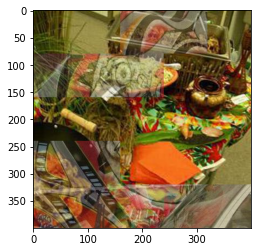

12


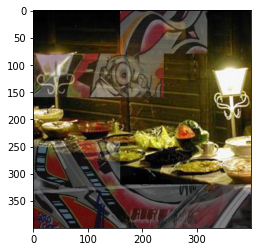

12


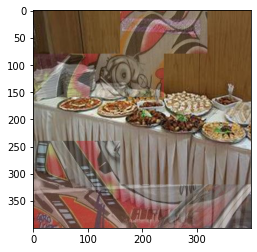

SSIM between target & adversary image [0.7456790189953728, 0.6034886336422808, 0.7301789014439027]
PSNR between target & adversary image [18.83743821605418, 16.004079650587183, 20.462121167721683]
feature match before attack [4, 0, 0]
feature match after attack [40, 220, 118]
percentage feature matching increase ['900.0%', 220, 118]
12


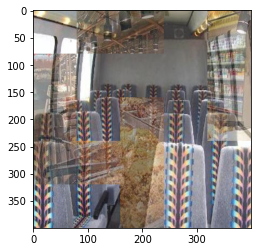

12


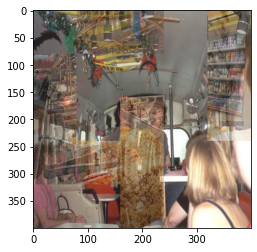

12


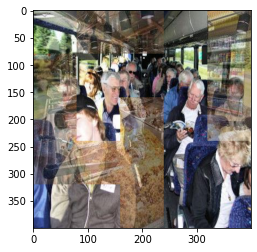

12


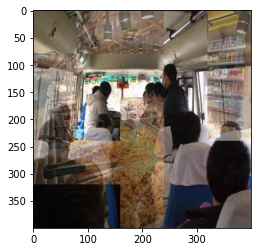

12


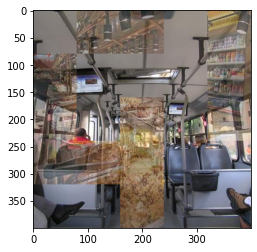

12


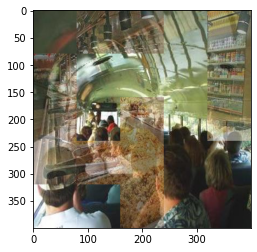

SSIM between target & adversary image [0.729643236108599, 0.7274157075505112, 0.7401938303466565, 0.6909135012883061, 0.7177879976871617, 0.7132201063907951]
PSNR between target & adversary image [17.35388594653193, 19.527403201062626, 17.599564309426754, 16.87747478707156, 19.155728842433298, 18.64943217472479]
feature match before attack [11, 7, 6, 7, 4, 4]
feature match after attack [27, 38, 13, 52, 57, 54]
percentage feature matching increase ['145.45454545454547%', '442.8571428571429%', '116.66666666666667%', '642.8571428571429%', '1325.0%', '1250.0%']
12


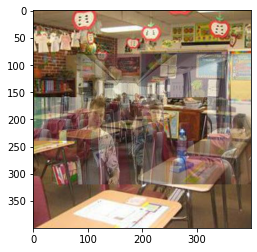

12


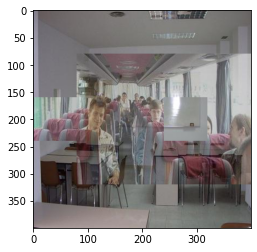

12


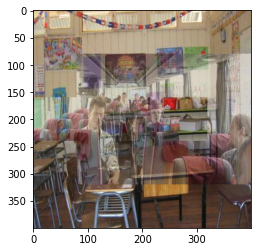

12


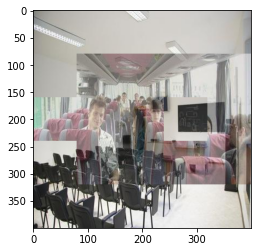

12


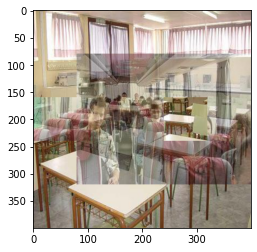

12


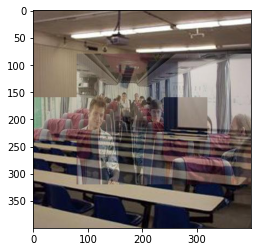

SSIM between target & adversary image [0.7653707486798869, 0.7076512518105922, 0.749760095038544, 0.7141564718975193, 0.7527175244349227, 0.7368421730159415]
PSNR between target & adversary image [17.715050587336844, 19.569223667069902, 19.62954495767048, 17.293006942124403, 17.215518889508832, 18.794123507332923]
feature match before attack [5, 4, 4, 0, 4, 17]
feature match after attack [20, 187, 61, 152, 33, 101]
percentage feature matching increase ['300.0%', '4575.0%', '1425.0%', 152, '725.0%', '494.11764705882354%']
12


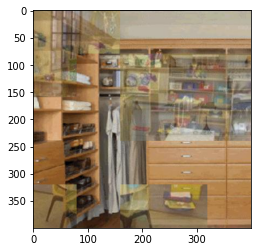

IndexError: list index out of range

In [5]:
import cv2
import imageio
import time
from matplotlib import pyplot as plt
from PIL import Image  
from PIL import Image as im
import numpy as np

from skimage.metrics import structural_similarity as ssim
import argparse
import shutil
import os


base_images=[]
folders=[]
folders_full=[]
save_folders=[]
csv_saves=[]
folder_4_base=r"E:\selected dataset\bases for all category" #folder containing base images of each target class
folder=r"E:\selected dataset\MIT withoutbase" #folder containing multiple classes folder of target images

save_folder=r"E:\selected dataset\demo save" 


for filename in os.listdir(folder_4_base):
        base_images.append((os.path.join(folder_4_base,filename)))
        
for filename in os.listdir(folder):
        folders.append((os.path.join(folder,filename)))
        
for filename in os.listdir(save_folder):
        save_folders.append(os.path.join(save_folder,filename))

M=25 #total number of boxes
N=12 #picked number of boxes
    

for main_loop in range(10): #number of classes 

    img2_arr=[]
    img3_arr=[]
    imgO_arr=[]
    imgnew_arr=[]
    savee=[]
    for i in range(len(os.listdir(folders[main_loop]))):
        savee.append('\p'+str(i)+'.jpg')

    img1_arr=imageio.imread(base_images[main_loop])
    a=0
    b=0

    for filename in os.listdir(folders[main_loop]):
            img2_arr.append(imageio.imread(os.path.join(folders[main_loop],filename)))
            imgO_arr.append(imageio.imread(os.path.join(folders[main_loop],filename)))
    v=0
 ########################################################################################################
    for i in range(len(img2_arr)):
        
        im_average=img2_arr[i]
        split1=[]
        split2=[]
        averaged=[]
        
        #decide box size according to your image size and M
        windowsize_r = 80
        windowsize_c = 80

        a=0
        for r in range(0,img1_arr.shape[0], windowsize_r):
            for c in range(0,img1_arr.shape[1], windowsize_c):
                arr=img1_arr[r:r+windowsize_r,c:c+windowsize_c,:]     
                image=im.fromarray(arr)
                split1.append(np.array(image))
        for r in range(0,img2_arr[i].shape[0], windowsize_r):
            for c in range(0,img2_arr[i].shape[1], windowsize_c):
                arr=img2_arr[i][r:r+windowsize_r,c:c+windowsize_c,:]     
                image=im.fromarray(arr)
                split2.append(np.array(image))
        im_average=split2.copy()



        saved=[]
        image_init_selected=[]
        image_target_selected=[]
        m1=[]
        maxed=[]
        sift64 = cv2.xfeatures2d.SURF_create()
        for j in range(M):
            kp1, des1 = sift64.detectAndCompute(split1[j],None)
            pts_adv = cv2.KeyPoint_convert(kp1)
            m1.append(len(pts_adv))
        
        for i in range(N):
            maxed.append(int(max(m1)))
            
            saved.append(m1.index(max(m1)))
            n1=m1.index(max(m1))
            m1[n1]=0
        for i in saved:
            image_init_selected.append(split1[i])
            image_target_selected.append(split2[i])
        print(len(image_target_selected))



        #selected Average!
        def image_average(img1,img2):
                sum=np.average((img1, img2),axis=0)
                sum=sum.astype(np.uint8)
                return sum

        averaged=[]
        for j in range(len(image_target_selected)):
            image_target1=image_target_selected[j]
            image_init1=image_init_selected[j]
            averaged.append(image_average(image_target1,image_init1))
        j=0

        for i in saved:
                im_average[i]=averaged[j]
                j=j+1
        for i in range(M):
                arr2im=im.fromarray(im_average[i])
                arr2im.save('average'+str(i)+'.jpg')
        image1=[]
        blank_image = Image.new("RGB", (400, 400))
        for a in range(M):
            image1.append(Image.open('average'+str(a)+'.jpg'))


        list1=[0,80,160,240,320] #set it according to your boxes size
        k=0
        for i in list1:
            for j in list1:
                blank_image.paste(image1[k], (j,i))
                k=k+1
        plt.imshow(blank_image)
        plt.show()



  ##########################################################################################################          
        im2=blank_image
        im3=blank_image
      
        im2 = im2.save(save_folders[main_loop]+savee[v]) 
        imgnew_arr.append(imageio.imread(save_folders[main_loop]+savee[v]))
        v=v+1
    def calculate_SSIM(imageA,imageB):
        s = ssim(imageA, imageB,multichannel=True)
        
        return s
    SSIM1=[]
    for i in range(len(os.listdir(folders[main_loop]))):
        SSIM1.append(calculate_SSIM((imgO_arr[i]),(imgnew_arr[i])))
    print("SSIM between target & adversary image",SSIM1)
    def calculate_PSNR(im1,im2):
        P=cv2.PSNR(im1,im2)
        
        return P
    PSNR1=[]
    for i in range(len(os.listdir(folders[main_loop]))):
        PSNR1.append(calculate_PSNR(imgO_arr[i],imgnew_arr[i]))
    print("PSNR between target & adversary image",PSNR1)


    def feature_match(check):

        sift = cv2.xfeatures2d.SURF_create()
        kpNEW1, desNEW1 = sift.detectAndCompute(check, None)
        kpNEW2, desNEW2 = sift.detectAndCompute(adv_image, None)

        pts_adv0 = cv2.KeyPoint_convert(kpNEW1)
        pts_init0 = cv2.KeyPoint_convert(kpNEW2)

        FLANN_INDEX_KDTREE = 1
        index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
        search_params = dict(checks = 50)
        flann = cv2.FlannBasedMatcher(index_params, search_params)

        matchesgood1 = flann.knnMatch(desNEW1,desNEW2,k=2)


        # store all the good matches as per Lowe's ratio test.
        good1 = []
        for m,n in matchesgood1:
            if m.distance < 0.7*n.distance:
                good1.append(m)

        src_pts1 = np.float32([ kpNEW1[m.queryIdx].pt for m in good1 ]).reshape(-1,1,2)
        dst_pts1 = np.float32([ kpNEW2[m.trainIdx].pt for m in good1 ]).reshape(-1,1,2)
        M, mask = cv2.findHomography(src_pts1, dst_pts1, cv2.RANSAC,3.0)
        mask=list(mask)
        inliers=mask.count(1)
       
        return inliers
    adv_image=img1_arr
    inliers_OP=[]
    for i in range(len(os.listdir(folders[main_loop]))):
        inliers_OP.append(feature_match(imgnew_arr[i]))
    adv_image=img1_arr
    inliers_OO=[]
    for i in range(len(os.listdir(folders[main_loop]))):
        inliers_OO.append(feature_match(imgO_arr[i]))
    print("feature match before attack",inliers_OO)
    print("feature match after attack",inliers_OP)
    PFMI=[]
    for i in range(len(os.listdir(folders[main_loop]))):
        try:
            PFMI.append(str(((inliers_OP[i]-inliers_OO[i])/inliers_OO[i])*100)+str('%'))
        except:
            PFMI.append(inliers_OP[i])
    print("percentage feature matching increase",PFMI)
